# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_Mouse_Data_df = mouse_metadata.merge(study_results, how='inner',on='Mouse ID')

# Display the data table for preview
Combined_Mouse_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
MouseCount = len(pd.unique(Combined_Mouse_Data_df['Mouse ID']))
print('Total Mice:',MouseCount)

Total Mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Combined_Mouse_Data_df["ID_TP"] = Combined_Mouse_Data_df["Mouse ID"] + Combined_Mouse_Data_df["Timepoint"].astype(str)
Combined_Mouse_Data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dups_Df = Combined_Mouse_Data_df.value_counts("ID_TP")>1
Dups_Df.head()


ID_TP
g9895     True
g98920    True
g98915    True
g98910    True
g9890     True
Name: count, dtype: bool

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse_Data_df = Combined_Mouse_Data_df.drop_duplicates(subset=['ID_TP'])
Clean_Mouse_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [5]:
# Checking the number of mice in the clean DataFrame.
NewMouseCount = len(pd.unique(Clean_Mouse_Data_df['Mouse ID']))
print('Total Mice:',NewMouseCount)

Total Mice: 249


## Summary Statistics

In [6]:
Clean_Mouse_Data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'ID_TP'],
      dtype='object')

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Filtered_Data_df = Clean_Mouse_Data_df[["Drug Regimen","Tumor Volume (mm3)"]]
Filtered_Data_df.head()
mean = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
S_E_M = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Summary_df = pd.DataFrame({"Tumor Mean": mean,
                         "Tumor Median": median,
                         "Tumor Variance": variance,
                         "Tumor St Dev": standard_deviation,
                          "Tumor SEM": S_E_M})
Summary_df.head()

,Tumor Mean,Tumor Median,Tumor Variance,Tumor St Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [131]:
#Create df showing timepoint counts
Timepoints_Data_df = Clean_Mouse_Data_df.groupby('Drug Regimen')['Timepoint'].count().rename_axis('Drug Regimen').reset_index(name='Timepoint Counts')
Timepoints_Data_df = Timepoints_Data_df.sort_values(by="Drug Regimen", ascending=True)
Timepoints_Data_df = Timepoints_Data_df.sort_values(by="Timepoint Counts", ascending=False)
Timepoints_Data_df.head()


,Drug Regimen,Timepoint Counts
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182


Text(0, 0.5, '# of Observed Mouse Timepoints')

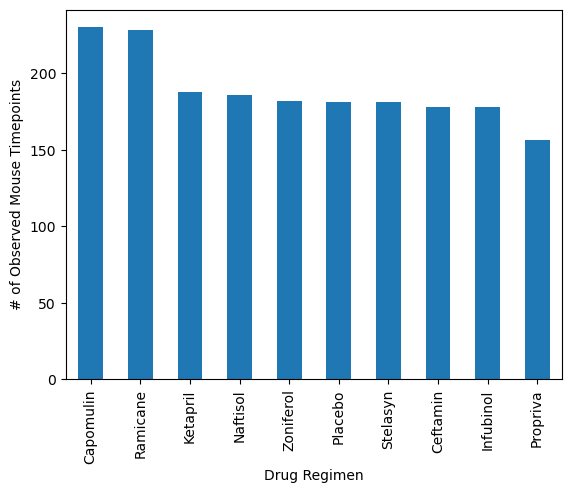

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Timepoints_Chart_df=pd.DataFrame(Timepoints_Data_df)
Timepoints_Chart_df.head()
Chart = Timepoints_Chart_df.plot(x="Drug Regimen",y="Timepoint Counts",kind='bar',legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

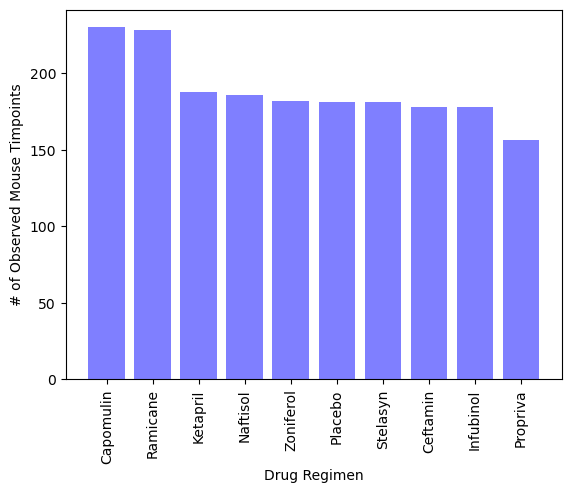

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


Count = Timepoints_Data_df["Timepoint Counts"]
x_axis = Timepoints_Data_df["Drug Regimen"]

plt.bar(x_axis, Count, color ='b', alpha=0.5, align='center')

plt.xticks(rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")

plt.show()

In [152]:
MFDist_Data_df = Clean_Mouse_Data_df.groupby('Sex')['Sex'].count().rename_axis('Sex').reset_index(name='Sex Count')
MFDist_Data_df.head()

# MFDist_Data_df = pd.DataFrame({"Sex":Clean_Mouse_Data_df["Sex"],
#                                "Drug Regimen": Clean_Mouse_Data_df["Drug Regimen"]})
# MFDist_Data_df.head()

,Sex,Sex Count
0,Female,930
1,Male,958


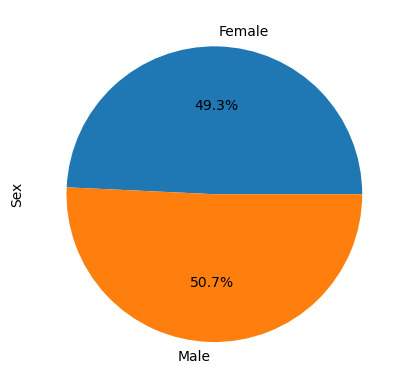

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
MFDist_Chart_df=pd.DataFrame(MFDist_Data_df)
MFDist_Chart_df.head()
Pie_Chart = MFDist_Chart_df.plot(y='Sex Count',kind='pie',autopct='%1.1f%%', labels = MFDist_Chart_df["Sex"], legend=False, ylabel="Sex")

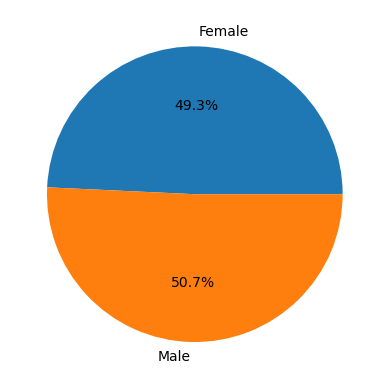

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(MFDist_Chart_df["Sex Count"], labels=MFDist_Chart_df["Sex"], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Clean_Mouse_Data_df.head()
# Start by getting the last (greatest) timepoint for each mouse
Tumor_Volume_df = Clean_Mouse_Data_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index(name="Timepoint")
Tumor_Volume_df.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Max_Tumor_Volumne = Tumor_Volume_df.merge(Clean_Mouse_Data_df, how='inner',on=["Mouse ID","Timepoint","Drug Regimen"])
Max_Tumor_Volumne.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,ID_TP
0,Capomulin,b128,45,Female,9,22,38.982878,2,b12845
1,Capomulin,b742,45,Male,7,21,38.939633,0,b74245
2,Capomulin,f966,20,Male,16,17,30.485985,0,f96620
3,Capomulin,g288,45,Male,3,19,37.074024,1,g28845
4,Capomulin,g316,45,Female,22,22,40.159220,2,g31645


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
